In [22]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import tqdm,timeit
import numpy as np
import random
from collections import OrderedDict

### PART1


1.) Write a script to generate an p-ER random graph.

In [2]:
er = nx.erdos_renyi_graph(15,0.4,seed=1453,directed=False) 

C:\Users\Theo\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


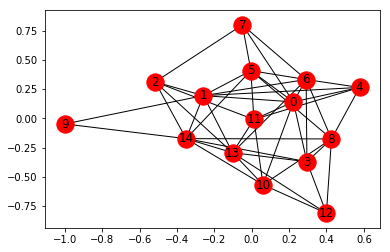

In [3]:
nx.draw_networkx(er, with_labels=True)
plt.show()


2.) Write a script to generate an r-regular random graph.

In [27]:
def create_regular(nodes,neighbours):
    if nodes<=neighbours:
        print('neighbours cant be higher or equal than the total nodes')
    elif (nodes*neighbours)%2 !=0:
        print('the product of nodes and neighbours must be an even number')
    else:
        
        
        A=nx.Graph()
        A.add_nodes_from([i for i in range(nodes)])
        for i in A.nodes():
            for j in A.nodes():
                    if A.degree(i)<neighbours:
                        test = sorted(A.degree, key=lambda x: x[1])[0][0]
                        if i!=test:
                            A.add_edge(i,test)
        nx.draw_networkx(A, with_labels=True)

        plt.show()

C:\Users\Theo\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


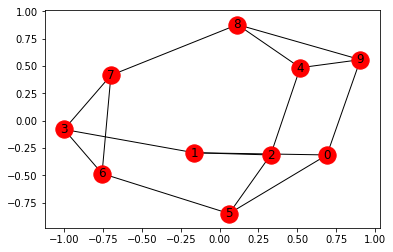

In [28]:
create_regular(10,3)

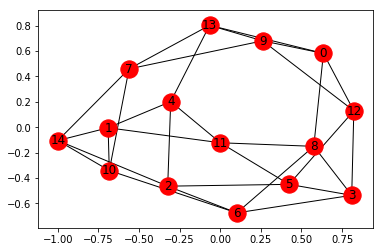

In [4]:
rrg=nx.random_regular_graph(4,15,seed=1453) # create regular random graph using library. For the rest of the hw,
# we will use the code provided by the library.
nx.draw_networkx(rrg, with_labels=True)
plt.show()

3.) Write a script to check the connectivity of a given graph.

In [2]:
def connectivity_irreducibility(graph):
    #nx.adjacency_matrix(graph,nodelist=range(len(graph.nodes))).todense()
    matrix =nx.adjacency_matrix(graph,nodelist=range(len(graph.nodes))).todense()
    sums=0
    for i in range(len(graph.nodes)):
        sums+=np.linalg.matrix_power(matrix, i)
    return np.all(sums>0)



In [7]:
connectivity_irreducibility(rrg)

True

In [3]:
def connectivity_laplacian(graph):
    L= nx.laplacian_matrix(graph,nodelist=range(len(graph.nodes))).todense()
    eighenvalues = np.linalg.eig(L)[0]
    sec_small_eig= np.sort(eighenvalues)[1]
    if sec_small_eig >0:
        return("Laplacian connectivity of graph is confirmed")
    else:
        return("Laplacian connectivity of graph is not true")
    

In [9]:
connectivity_laplacian(rrg)

'Laplacian connectivity of graph is confirmed'

In [10]:
connectivity_laplacian(er)

'Laplacian connectivity of graph is confirmed'

In [4]:
def connectivity_bfs(graph,starting_node):
    tree =nx.bfs_tree(graph,starting_node)
    if len(tree.nodes)==len(graph.nodes):
        return("bfs confirms the connectivity")
    else:
        return("bfs rejects the connectivity")
    

In [12]:
connectivity_bfs(er,0)

'bfs confirms the connectivity'

4.) Compare the complexity as a function of n of the methods
above by plotting curves of a complexity measure vs n.

100%|██████████| 92/92 [00:40<00:00,  1.97s/it] 


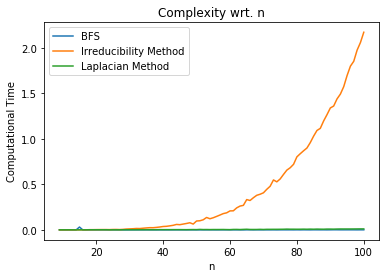

In [6]:
n_seq = list(range(9,101))
timing_bfs = []
timing_irreducible = []
timing_laplacian = []
for n in tqdm.tqdm(n_seq):
    g = nx.random_regular_graph(8,n)
   
    start = timeit.default_timer()
    a = connectivity_bfs(g,0)
    stop = timeit.default_timer()
    timing_bfs.append(stop - start)

    start = timeit.default_timer()
    a = connectivity_irreducibility(g)
    stop = timeit.default_timer()
    timing_irreducible.append(stop - start)

    start = timeit.default_timer()
    a = connectivity_laplacian(g)
    stop = timeit.default_timer()
    timing_laplacian.append(stop - start)

plt.plot(n_seq,timing_bfs,label = "BFS")
plt.plot(n_seq,timing_irreducible,label = "Irreducibility Method")
plt.plot(n_seq,timing_laplacian,label = "Laplacian Method")
plt.legend()
plt.title("Complexity wrt. n")
plt.xlabel("n")
plt.ylabel("Computational Time")
plt.savefig('connectivity_check.png')

plt.show()


5.) Let pc (G) denote the probability that a graph G is connected.
By running Monte Carlo simulations estimates pc (G) and
produce two curve plots:

In [7]:
def monte_carlo_erdos(nodes,p):
    counter=0
    for i in range(nodes): # size of the monte carlo simulation
        er = nx.erdos_renyi_graph(nodes,p,directed=False)

        L= nx.laplacian_matrix(er,nodelist=range(len(er.nodes))).todense()
        eighenvalues = np.linalg.eig(L)[0]
        sec_small_eig= np.sort(eighenvalues)[1]
        if sec_small_eig >0:
            counter+=1

        else:
            pass
    return counter/nodes

In [16]:
monte_carlo_erdos(100,0.2)

1.0

In [8]:
pER1=[]
pVec=[0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2]
for j in range(len(pVec)):
    pER1.append(monte_carlo_erdos(100,pVec[j]))

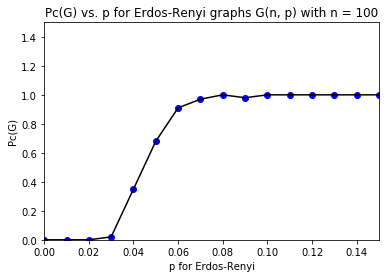

In [9]:
plt.plot(pVec, pER1, 'bo',pVec, pER1, 'k')
plt.axis([0.0, 0.15, 0.0, 1.5])
plt.xlabel('p for Erdos-Renyi')
plt.ylabel('Pc(G)')
plt.title('Pc(G) vs. p for Erdos-Renyi graphs G(n, p) with n = 100')
plt.savefig('P_Erdos')

plt.show()

In [12]:
def monte_carlo_regular(r,nodes):
    counter=0
    for i in range(nodes): # size of the monte carlo simulation
        rrg=nx.random_regular_graph(r,nodes)
        L= nx.laplacian_matrix(rrg,nodelist=range(len(rrg.nodes))).todense()
        eighenvalues = np.linalg.eig(L)[0]
        sec_small_eig= np.sort(eighenvalues)[1]
        if sec_small_eig >0:
            counter+=1

        else:
            pass
    return counter/nodes



In [13]:
pRR2=[]
pRR16=[]
v2=[]
v16=[]
rvector=[2,16]
for j in range(3,100): # since the smallest value of r is 2, the nodes should be at least 3
    v2.append(j)
    pRR2.append(monte_carlo_regular(rvector[0],100))
for i in range(17,100):
    v16.append(i)
    pRR16.append(monte_carlo_regular(rvector[1],100))
    
    

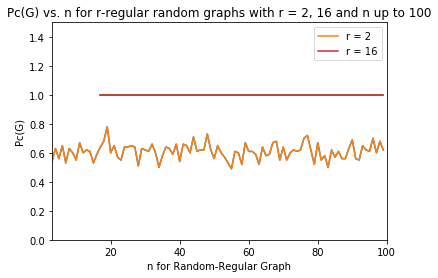

In [14]:
plt.plot(v2, pRR2, v2, pRR2, label = "r = 2")
plt.plot(v16,pRR16,v16,pRR16,label = "r = 16")
plt.axis([3, 100, 0.0, 1.5])
plt.title('Pc(G) vs. n for r-regular random graphs with r = 2, 16 and n up to 100')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlabel('n for Random-Regular Graph')
plt.ylabel('Pc(G)')
plt.savefig('P_Regular')

plt.show()

   ###                                                                 PART2

1.) Throughput performance
By re-using the scripts of part 1, write a script that: (i)
generates a random graph describing the topology of the ToR
switch network;

C:\Users\Theo\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


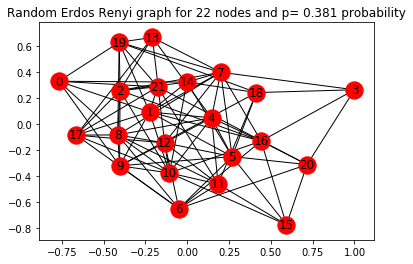

In [2]:
n = random.randint(9,101)
p= 8/(n-1)
tor_erdos = nx.erdos_renyi_graph(n,p,directed=False)
nx.draw_networkx(tor_erdos, with_labels=True)
plt.title('Random Erdos Renyi graph for ' +str(n)+ ' nodes and p= '+str(round(p,3))+' probability')

plt.show()

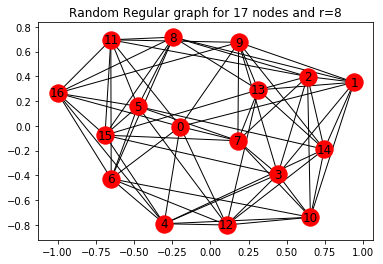

In [3]:
n = random.randint(9,101)
r=8
tor_reg=nx.random_regular_graph(r,n)
nx.draw_networkx(tor_reg, with_labels=True)
plt.title('Random Regular graph for ' +str(n)+ ' nodes and r=8')

plt.show()


(ii) checks its connectivity;

In [ ]:
connectivity_bfs(tor_erdos,0)

In [ ]:
connectivity_bfs(tor_reg,0)

(iii) finds shortest
path routes;

In [4]:
def shortest_path(graph,start):
    a= nx.shortest_path(graph,start)
    a.pop(start)
    print("shortest paths for node "+str(start)+" is: ")
    print(a)

In [5]:
for i in tor_erdos.nodes():
    shortest_path(tor_erdos,i)

shortest paths for node 0 is: 
{1: [0, 1], 8: [0, 8], 9: [0, 9], 14: [0, 14], 19: [0, 19], 21: [0, 21], 4: [0, 1, 4], 5: [0, 1, 5], 7: [0, 1, 7], 10: [0, 1, 10], 16: [0, 1, 16], 17: [0, 1, 17], 2: [0, 8, 2], 6: [0, 8, 6], 11: [0, 8, 11], 12: [0, 8, 12], 18: [0, 9, 18], 13: [0, 19, 13], 20: [0, 21, 20], 15: [0, 1, 5, 15], 3: [0, 1, 7, 3]}
shortest paths for node 1 is: 
{0: [1, 0], 4: [1, 4], 5: [1, 5], 7: [1, 7], 9: [1, 9], 10: [1, 10], 14: [1, 14], 16: [1, 16], 17: [1, 17], 19: [1, 19], 21: [1, 21], 8: [1, 0, 8], 11: [1, 4, 11], 12: [1, 4, 12], 13: [1, 4, 13], 6: [1, 5, 6], 15: [1, 5, 15], 18: [1, 5, 18], 20: [1, 5, 20], 2: [1, 7, 2], 3: [1, 7, 3]}
shortest paths for node 2 is: 
{7: [2, 7], 8: [2, 8], 9: [2, 9], 10: [2, 10], 13: [2, 13], 14: [2, 14], 16: [2, 16], 17: [2, 17], 19: [2, 19], 21: [2, 21], 1: [2, 7, 1], 3: [2, 7, 3], 4: [2, 7, 4], 5: [2, 7, 5], 12: [2, 7, 12], 0: [2, 8, 0], 6: [2, 8, 6], 11: [2, 8, 11], 18: [2, 9, 18], 15: [2, 10, 15], 20: [2, 16, 20]}
shortest paths for no

(iv) estimates h.

In [15]:
def h_hat(graph):
    h=0
    all_paths=0
    for i in graph.nodes():
        b = nx.shortest_path_length(graph,i) #h
        all_paths +=len(b)-1 # how many paths there are for all nodes as starting point
        h+=sum(b.values()) # the sum of all lengths of paths from and to every node
    #print(all_paths)
    return(h/all_paths,all_paths)
    

    
    
    

In [81]:
h_hat(tor_erdos)

(1.6406926406926408, 462)

Plot the application-oblivious throughput bound TH (averaged
over many generated graphs), as defined above, versus n for
the two graph models.

In [16]:
def th(method,number_of_simulations):
    nodes= list(range(9,101))

    th_bounds=[]
    for i in tqdm.tqdm(nodes):
        n=i
        max_th=0
        
        if method=='erdos_renyi':
            p=8/(n-1)
            for j in range(number_of_simulations):
                graph= nx.erdos_renyi_graph(n,p,directed=False)
                m=int(np.random.normal(p*n*(n-1)/2))
                h_, all_path = h_hat(graph)
                vf=all_path/2 
                max_th += m/(h_*vf)
            th_bounds.append(max_th/number_of_simulations)


        elif method=='regular':
            r=8
            for j in range(number_of_simulations):
                graph=rrg=nx.random_regular_graph(r,n)
                m=n*r/2
                h_, all_path=h_hat(graph)
                vf=all_path/2 
                max_th += m/(h_*vf)
            th_bounds.append(max_th/number_of_simulations)

        else:
            print('Method that created the graph is not valid.')
            
            
    return(nodes,th_bounds)



            
        

    

In [17]:
a,b=th('erdos_renyi',10)

100%|██████████| 92/92 [00:27<00:00,  1.30it/s]


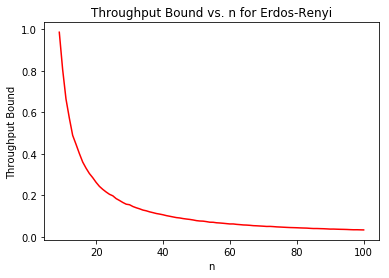

In [18]:
plt.plot(a,b,'r')
plt.title("Throughput Bound vs. n for Erdos-Renyi")
plt.xlabel("n")
plt.ylabel("Throughput Bound")
plt.savefig('TH_Erdos')

plt.show()

In [19]:
c,d=th('regular',10)

100%|██████████| 92/92 [00:28<00:00,  1.27it/s]


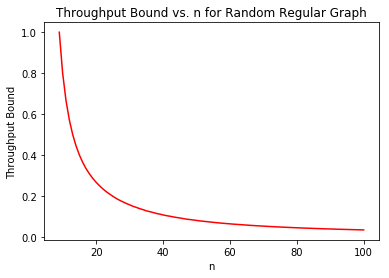

In [20]:
plt.plot(c,d,'r')
plt.title("Throughput Bound vs. n for Random Regular Graph")
plt.xlabel("n")
plt.ylabel("Throughput Bound")
plt.savefig('TH_RRG')

plt.show()